<a href="https://colab.research.google.com/github/Hayyin26/PCVK_Ganjil_25-26/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


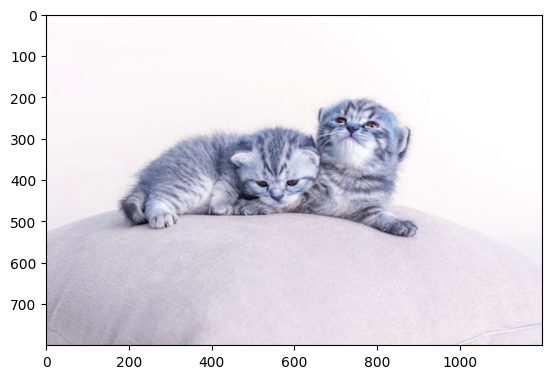

In [22]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/PCVK/kittenn.jpeg')
plt.imshow(img)

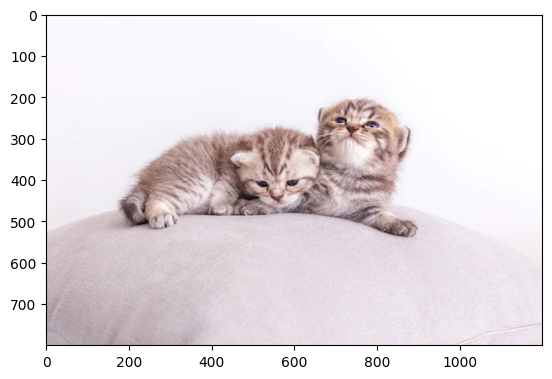

In [23]:
img2 = img
img3 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img3)

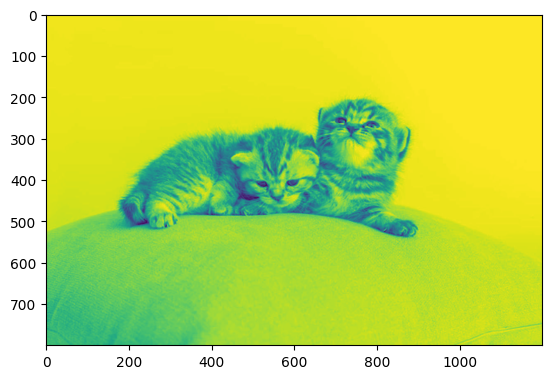

In [24]:
img_gray = cv.imread('/content/drive/MyDrive/PCVK/kittenn.jpeg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

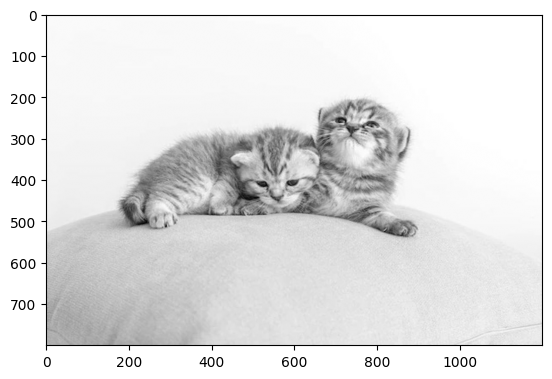

In [25]:
plt.imshow(img_gray, cmap='gray')

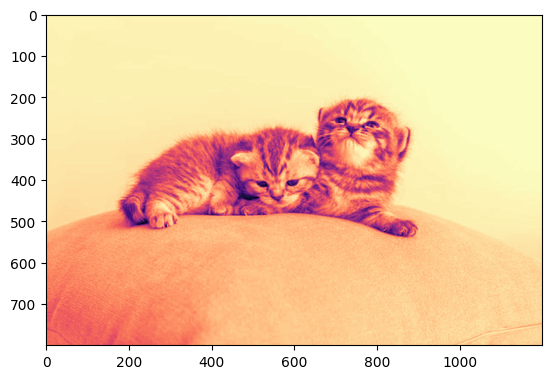

In [26]:
plt.imshow(img_gray, cmap='magma')

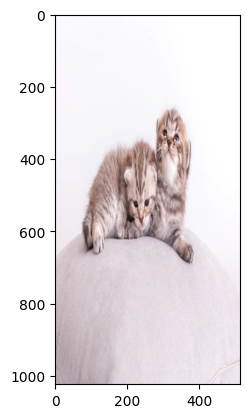

In [27]:
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512,1024))
plt.imshow(img4)

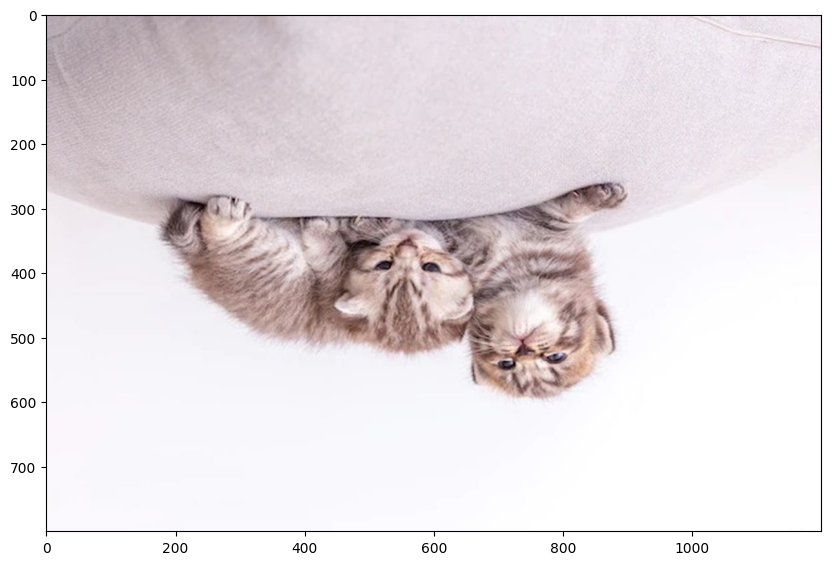

In [28]:
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

flg = plt.figure(figsize=(10,10))
ax = flg.add_subplot(111)
ax.imshow(img5)

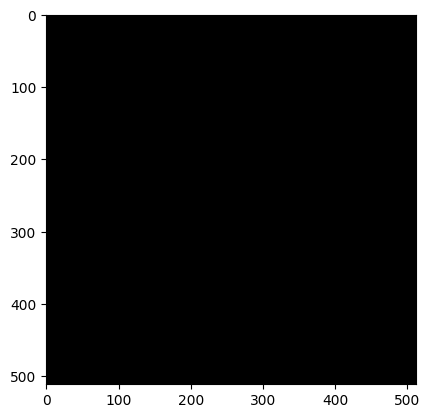

In [29]:
black_img = np.zeros(shape=(512,512,3), dtype=np.int16)
plt.imshow(black_img)

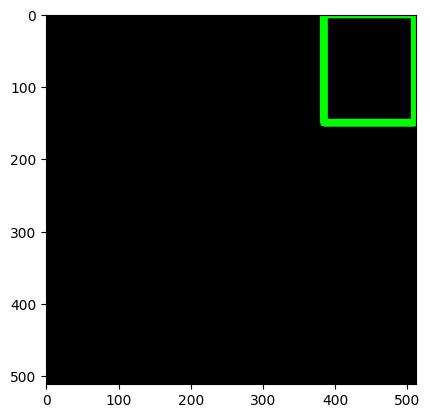

In [30]:
cv.rectangle(black_img, pt1 =(384,0),pt2 = (510,150),color = (0,255,0), thickness=10)
plt.imshow(black_img)

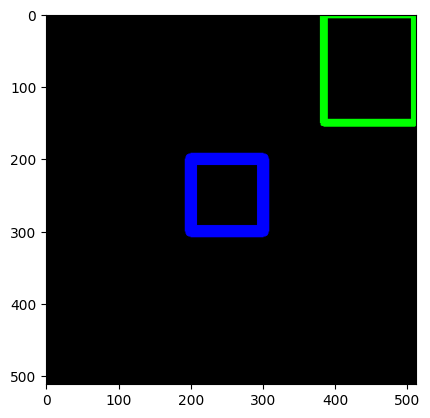

In [31]:
cv.rectangle(black_img, pt1 =(200,200),pt2 = (300,300),color = (0,0,255), thickness=15)
plt.imshow(black_img)

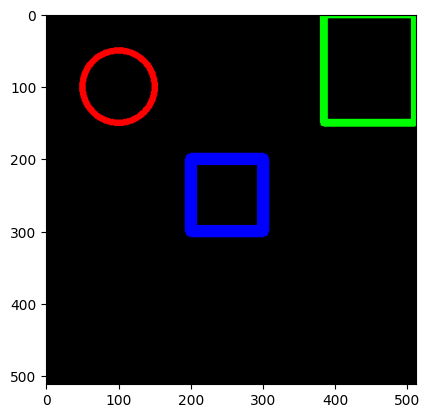

In [32]:
cv.circle(black_img, center=(100,100), radius=50, color=(255,0,0), thickness=8)
plt.imshow(black_img)

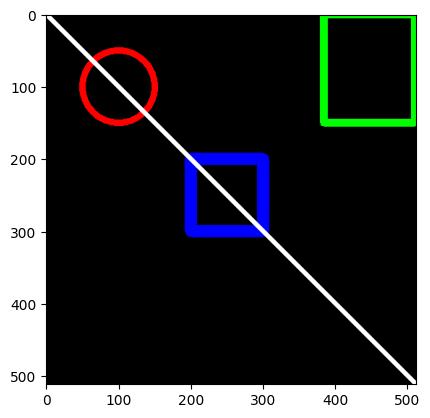

In [33]:
cv.line(black_img, pt1=(0,0), pt2=(512,512), color=(255,255,255), thickness=5)
plt.imshow(black_img)

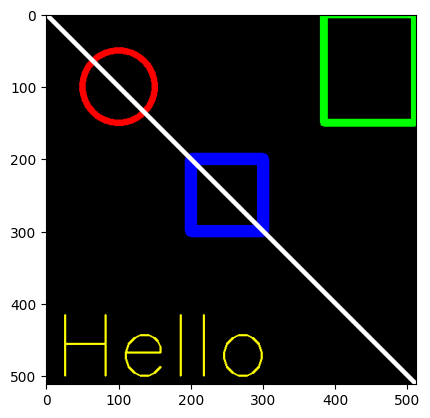

In [34]:
front = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, text='Hello', org=(10,500), fontFace=front, fontScale=4, color=(255,255,0), thickness=2, lineType=cv.LINE_AA)
plt.imshow(black_img)

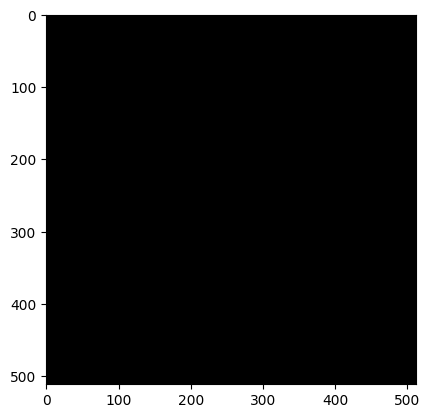

In [35]:
black_img2 = np.zeros(shape=(512,512,3), dtype=np.int32)
plt.imshow(black_img2)

In [36]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]],dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [37]:
pts = vertices.reshape((-1,1,2))
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

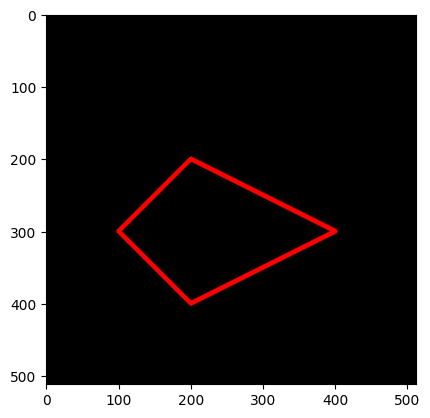

In [38]:
cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)
plt.imshow(black_img2)

# Pertanyaan

1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?
2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16
dan int32?
3. Apakah kegunaan “google.colab.patches import cv2_imshow” pada potongan kode
berikut
4. Apakah kegunaan “skimage import io” pada potongan kode soal nomor 3

1.

Perbedaan gambar tanpa dan dengan matplotlib

Tanpa matplotlib (pakai cv.imshow atau cv2_imshow), warna default OpenCV adalah BGR sehingga tampilan bisa “kebiru-biruan” jika tidak dikonversi.

Dengan matplotlib.pyplot.imshow, default warna adalah RGB sehingga perlu konversi cv.cvtColor(img, cv.COLOR_BGR2RGB). Hasilnya warna sesuai aslinya.

2.

Perbedaan black image tipe int16 dan int32

int16: nilai piksel terbatas dari -32.768 sampai 32.767. Kalau warna dipaksa keluar rentang (misal >255), bisa overflow.

int32: lebih aman, rentang sangat besar. Tapi konsumsi memori lebih besar.
👉 Pengaruhnya: hasil visual sama (karena warna tetap 0–255), tapi tipe int32 lebih aman untuk perhitungan lanjut.

3.

Kegunaan from google.colab.patches import cv2_imshow

Google Colab tidak bisa menampilkan jendela GUI (cv.imshow).

Fungsi cv2_imshow dipakai agar hasil citra bisa ditampilkan langsung di output notebook.

4.

Kegunaan from skimage import io

io dari skimage digunakan untuk membaca citra (misalnya .png, .jpg) dan mengembalikannya dalam format NumPy array.

Fungsinya mirip cv.imread, tapi mendukung lebih banyak format (misal TIFF, GIF).



# Tugas

1. Tidak. figsize hanya mengubah ukuran tampilan di layar/plot, bukan resolusi pixel asli gambar

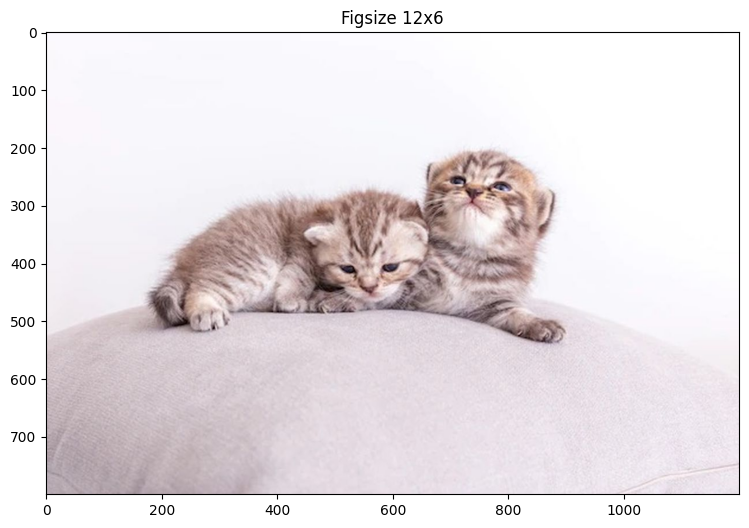

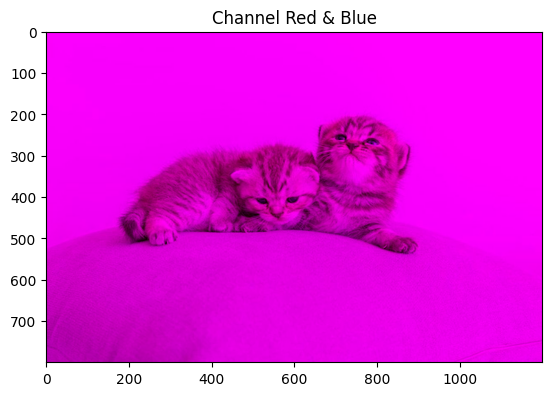

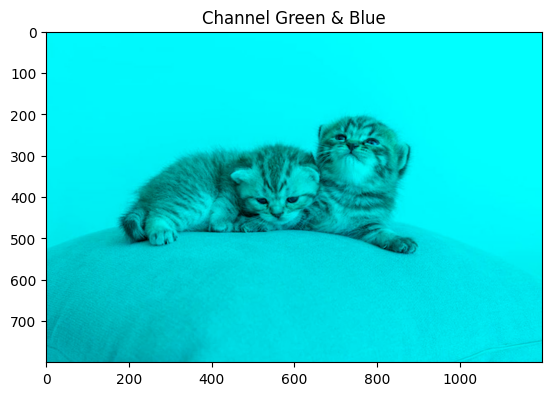

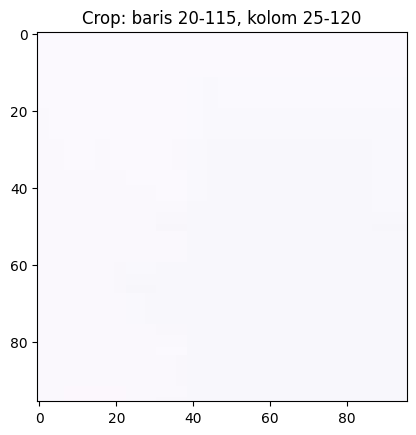

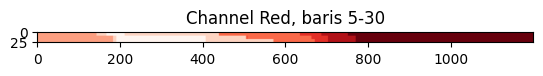

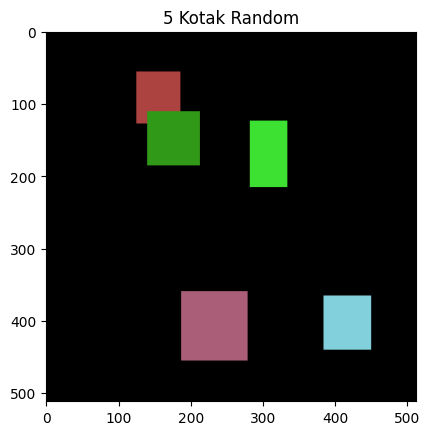

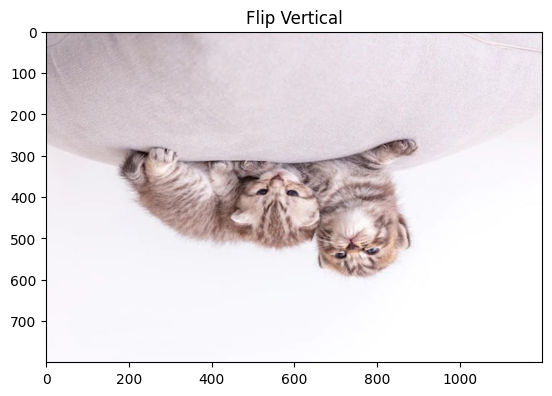

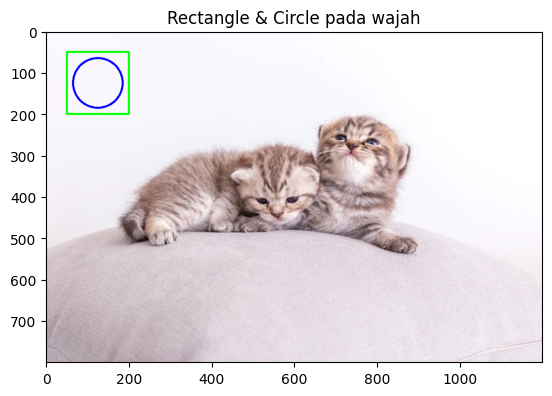

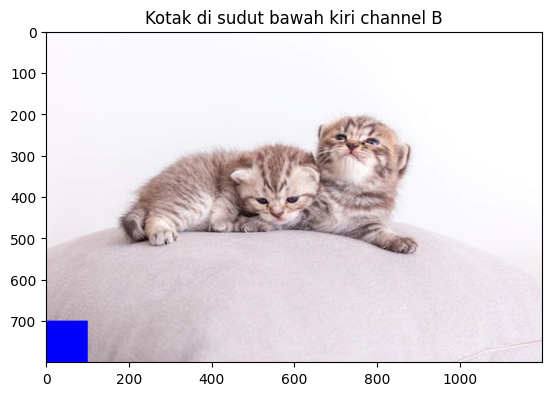

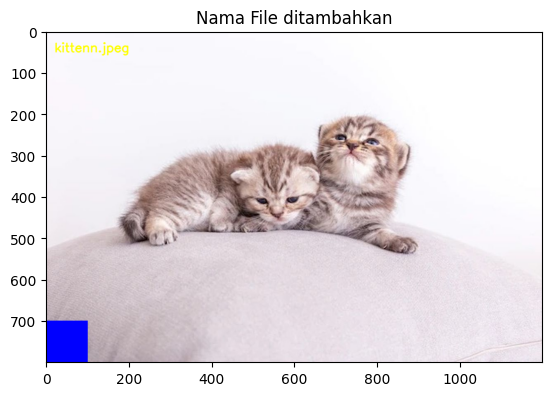

In [5]:
# === Import Library ===
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# === Load Image dari Google Drive ===
img = cv.imread('/content/drive/MyDrive/PCVK/kittenn.jpeg')

# Konversi ke RGB untuk ditampilkan dengan matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)


# === TUGAS 1: Cek apakah figsize mempengaruhi ukuran pixel ===
plt.figure(figsize=(12,6))  # hanya ubah tampilan, bukan pixel asli
plt.imshow(img_rgb)
plt.title("Figsize 12x6")


# === TUGAS 2: Tampilkan channel Red-Blue & Green-Blue (Fix) ===
zeros = np.zeros_like(img[:,:,0])

# Red & Blue (Green = 0)
img_rb = cv.merge([img[:,:,0], zeros, img[:,:,2]])   # format BGR
plt.figure(); plt.imshow(cv.cvtColor(img_rb, cv.COLOR_BGR2RGB))
plt.title("Channel Red & Blue")

# Green & Blue (Red = 0)
img_gb = cv.merge([img[:,:,0], img[:,:,1], zeros])   # format BGR
plt.figure(); plt.imshow(cv.cvtColor(img_gb, cv.COLOR_BGR2RGB))
plt.title("Channel Green & Blue")


# === TUGAS 3: Crop baris 20-115, kolom 25-120 ===
crop1 = img[20:116, 25:121]
plt.figure(); plt.imshow(cv.cvtColor(crop1, cv.COLOR_BGR2RGB))
plt.title("Crop: baris 20-115, kolom 25-120")


# === TUGAS 4: Baris 5-30, semua kolom, channel Red saja ===
red_channel = img[5:31, :, 2]
plt.figure(); plt.imshow(red_channel, cmap='Reds')
plt.title("Channel Red, baris 5-30")


# === TUGAS 5: Buat 5 kotak random ===
black_img = np.zeros((512,512,3), dtype=np.uint8)
for i in range(5):
    pt1 = (np.random.randint(0,400), np.random.randint(0,400))
    pt2 = (pt1[0]+np.random.randint(50,100), pt1[1]+np.random.randint(50,100))
    color = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
    cv.rectangle(black_img, pt1, pt2, color, -1)
plt.figure(); plt.imshow(black_img)
plt.title("5 Kotak Random")


# === TUGAS 6: Flip image (terbalik vertikal) ===
flip_img = cv.flip(img, 0)
plt.figure(); plt.imshow(cv.cvtColor(flip_img, cv.COLOR_BGR2RGB))
plt.title("Flip Vertical")


# === TUGAS 7: Rectangle & Circle di wajah (contoh pakai kittenn) ===
img_face = img.copy()
cv.rectangle(img_face, (50,50), (200,200), (0,255,0), 3)   # rectangle contoh
cv.circle(img_face, (125,125), 60, (255,0,0), 3)           # circle contoh
plt.figure(); plt.imshow(cv.cvtColor(img_face, cv.COLOR_BGR2RGB))
plt.title("Rectangle & Circle pada wajah")


# === TUGAS 8: Rectangle di sudut bawah kiri channel B (Fix) ===
img_b = img.copy()
h, w = img.shape[:2]

# bikin kotak warna biru (aktifkan channel B saja)
cv.rectangle(img_b, (0,h-100), (100,h), (255,0,0), -1)

plt.figure()
plt.imshow(cv.cvtColor(img_b, cv.COLOR_BGR2RGB))
plt.title("Kotak di sudut bawah kiri channel B")


# === TUGAS 9: Tambahkan tulisan nama file ===
front = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img_b, 'kittenn.jpeg', (20,50), front, 1, (0,255,255), 2, cv.LINE_AA)
plt.figure(); plt.imshow(cv.cvtColor(img_b, cv.COLOR_BGR2RGB))
plt.title("Nama File ditambahkan")


plt.show()
